In [2]:
import numpy as np

所有的`axis`，统一理解为：只改变这个维度。

怎么说？ 假设对于二维数组，如果axis=1，意思是axis=0的维度不要变更，不管你做的是求和，还是拆分，合并什么的，操作完后，“**行数**”一定不能变

所以不要从几何上想是竖向操作数据还是横向，越想越混，维度越高还越想不清白，只需要明确一点，没有写在`axis`参数里的，操作完后它的维度肯定不能变。

### split and merge

In [10]:
import numpy as np
a = np.arange(140).reshape(4, 35)
# 横向5等分, 这时候传的参数叫sections
# 等同于split, axis=1
np.hsplit(a, 7)
# 纵向2等分
np.vsplit(a, 2)
# 按索引分, 这时候传的参数是indices
# 下例，理解为索引分别取到5， 11， 16，剩下的打包
np.split(a, (5, 11, 16), axis=1)

[array([[  0,   1,   2,   3,   4],
        [ 35,  36,  37,  38,  39],
        [ 70,  71,  72,  73,  74],
        [105, 106, 107, 108, 109]]),
 array([[  5,   6,   7,   8,   9,  10],
        [ 40,  41,  42,  43,  44,  45],
        [ 75,  76,  77,  78,  79,  80],
        [110, 111, 112, 113, 114, 115]]),
 array([[ 11,  12,  13,  14,  15],
        [ 46,  47,  48,  49,  50],
        [ 81,  82,  83,  84,  85],
        [116, 117, 118, 119, 120]]),
 array([[ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          29,  30,  31,  32,  33,  34],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69],
        [ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99, 100, 101, 102, 103, 104],
        [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139]])]

### 拼接，去维度

In [14]:
import numpy as np
a = np.arange(140).reshape(4, 35)
b = np.empty((4, 35))
np.append(b, a, axis=1).shape, np.hstack([b, a]).shape, \
np.append(b, a, axis=0).shape, np.vstack([b, a]).shape

((4, 70), (4, 70), (8, 35), (8, 35))

要保留维度怎么做？ (4,35)拼接为(2, 4, 35)
- 我目前能想到只有加升维
- 或者利用原生python数组的append功能

In [29]:
np.append(b[None,...], a[None,...], axis=0).shape
c = []
c.append(a)
c.append(b)
np.array(c).shape

(2, 4, 35)

### pad

pad默认每个维度都会pad，要自定义只能每个维度都传进去，

In [34]:
b = np.arange(150).reshape(3,2,5,5)
b = np.pad(b, pad_width=((0,0),(0,0),(1,1),(1,1)))
b.shape, b

((3, 2, 7, 7),
 array([[[[  0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   1,   2,   3,   4,   0],
          [  0,   5,   6,   7,   8,   9,   0],
          [  0,  10,  11,  12,  13,  14,   0],
          [  0,  15,  16,  17,  18,  19,   0],
          [  0,  20,  21,  22,  23,  24,   0],
          [  0,   0,   0,   0,   0,   0,   0]],
 
         [[  0,   0,   0,   0,   0,   0,   0],
          [  0,  25,  26,  27,  28,  29,   0],
          [  0,  30,  31,  32,  33,  34,   0],
          [  0,  35,  36,  37,  38,  39,   0],
          [  0,  40,  41,  42,  43,  44,   0],
          [  0,  45,  46,  47,  48,  49,   0],
          [  0,   0,   0,   0,   0,   0,   0]]],
 
 
        [[[  0,   0,   0,   0,   0,   0,   0],
          [  0,  50,  51,  52,  53,  54,   0],
          [  0,  55,  56,  57,  58,  59,   0],
          [  0,  60,  61,  62,  63,  64,   0],
          [  0,  65,  66,  67,  68,  69,   0],
          [  0,  70,  71,  72,  73,  74,   0],
          [  0,   0,   0,   0,   0, 

In [44]:
aa = np.arange(16).reshape(4, 4)
np.pad(aa, ((1,1), (2,2)))
# np.pad(aa, (1, (2,2))) # 不行，要么一起设，要么一起不设
np.pad(aa, (1, 2))
# 上式等同于
np.pad(aa, ((1, 1), (1, 2)))

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  3,  0,  0],
       [ 0,  4,  5,  6,  7,  0,  0],
       [ 0,  8,  9, 10, 11,  0,  0],
       [ 0, 12, 13, 14, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [57]:
a = np.zeros((3, 9))
a1 = np.arange(1,4).reshape(-1,1)
# a[:,0] = a1       # 会失败，0取出来就降维了
a[:,0:1] = a1       # 切片降维
a[...,None,1] = a1  # 或者先升维再降维（有点无聊）
a

array([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 0., 0., 0., 0., 0., 0., 0.]])

### np.where

np.where 把符合条件的元素在对应维度上的索引返回，对于2维数组，自然返回的就是行的索引（集合）和列的索引（集合）

In [65]:
a = np.arange(25).reshape(5, 5)
rows, cols = np.where(a>2)
rows, cols

(array([0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 array([3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

### 插值interp

array([ 0.00000000e+00,  1.18063030e-01,  2.36126061e-01,  3.54189091e-01,
        4.72252121e-01,  5.90315152e-01,  6.77687624e-01,  7.40507651e-01,
        8.03327677e-01,  8.66147703e-01,  9.28967730e-01,  9.82383623e-01,
        9.60566457e-01,  9.38749291e-01,  9.16932125e-01,  8.95114959e-01,
        8.73297793e-01,  8.01861494e-01,  7.05615630e-01,  6.09369766e-01,
        5.13123902e-01,  4.16878038e-01,  3.14100132e-01,  1.88460079e-01,
        6.28200263e-02, -6.28200263e-02, -1.88460079e-01, -3.14100132e-01,
       -4.16878038e-01, -5.13123902e-01, -6.09369766e-01, -7.05615630e-01,
       -8.01861494e-01, -8.73297793e-01, -8.95114959e-01, -9.16932125e-01,
       -9.38749291e-01, -9.60566457e-01, -9.82383623e-01, -9.28967730e-01,
       -8.66147703e-01, -8.03327677e-01, -7.40507651e-01, -6.77687624e-01,
       -5.90315152e-01, -4.72252121e-01, -3.54189091e-01, -2.36126061e-01,
       -1.18063030e-01, -2.44929360e-16])

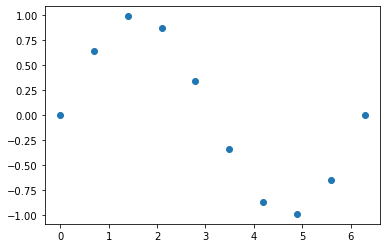

In [2]:
import numpy as np
# x = 1, 3, 5, 10
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
yinterp
# 可以这么理解：生成的个数还是以xvals为主，但是考虑了每个x作为关键帧, 在关键帧中间做插值

### unpackbits

In [9]:
a = np.array([3,4,5], dtype=np.uint8)[...,None]
b = np.unpackbits(a, 1)
b

array([[0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1]], dtype=uint8)